In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cik.csv to cik (2).csv


In [ ]:
#Code taken from here:
#https://github.com/punitarani/getCIK
#https://punit-arani.medium.com/get-the-cik-number-for-a-stock-using-python-2eaa494fbd91

#Get the CIK of a ticker from the downloaded cik.csv file
#cik.csv is a tab delimited file with all tickers and CIKs
#imports
import pandas as pd

#location of cik.csv
cikDir = 'cik.csv'

#read cik.csv as a pandas DataFrame
ciksDF = pd.read_csv(cikDir, delimiter='\t', header=None)

#set the column with all the tickers as the index
ciksDF = ciksDF.set_index(0)


#function to return CIK of a ticker
def getCIK(ticker):
    #return CIK if it exists
    try:
        return int(ciksDF.loc[ticker.lower(), 1])

    #return None there's no CIK for the ticker
    except:
        return None

tickers = ['HON','EFX','GE','BA','UPS','DE','ADP','LMT','ETN','ITW','CSX','FDX','NOC']
CIK = []
for ticker in tickers:
  CIK.append(getCIK(ticker))

#We now have all the corresponding CIK codes in the CIK list for further usage

FileNotFoundError: ignored

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# Function to get 10-K URLs within a specified date range
def get_10k_urls(cik, start_date, end_date, type='10-K'):
    base_url = f'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK={cik}&type={type}&dateb={end_date}&owner=exclude&count=40'
    print(base_url) #for debug purposes
    edgar_response = requests.get(base_url)
    soup = BeautifulSoup(edgar_response.text, 'html.parser')
    doc_links = []
    for link in soup.find_all('a', id='documentsbutton'):
        filing_date = link.find_previous('td').get_text()
        if start_date <= filing_date <= end_date:
            doc_links.append('https://www.sec.gov' + link['href'])
    return doc_links

#'773840'
start_date = '20090101'  # Start date in YYYYMMDD format
end_date = '20191231'
get_10k_urls(773840,start_date,end_date)


'''# Function to extract Item 7
def extract_item_7(doc_url):
    doc_response = requests.get(doc_url)
    soup = BeautifulSoup(doc_response.text, 'html.parser')
    txt_url = ''
    for table_row in soup.find_all('tr'):
        if '10-K' in table_row.get_text():
            txt_url = 'https://www.sec.gov' + table_row.find('a')['href']
            break
    txt_response = requests.get(txt_url)
    item_7 = re.search(r'Item 7[^.]*Management\'s Discussion and Analysis[^.]*', txt_response.text, re.IGNORECASE)
    if item_7:
        item_7_text = item_7.group()
        return item_7_text
    else:
        return 'Item 7 not found'

# Define the date range
start_date = '20090101'  # Start date in YYYYMMDD format
end_date = '20191231'  # End date in YYYYMMDD format

# Loop over the CIK list and extract Item 7 for each
for idx, cik in enumerate(CIK):
    if cik is not None:
        doc_urls = get_10k_urls(cik, start_date, end_date)
        for doc_url in doc_urls:
            print(f'Document URL for CIK {cik}: {doc_url}')
            item_7_text = extract_item_7(doc_url)
            print(f'Item 7 Text for CIK {cik}: {item_7_text}')
            # Store the extracted Item 7
            with open(f'item_7_{cik}.txt', 'a') as file:  # Use 'a' mode to append if there are multiple 10-Ks for the same CIK
                file.write(item_7_text + "\n\n")  # Separate multiple 10-Ks with newlines
    else:
        print(f"No CIK found for ticker {tickers[idx]}")'''




In [ ]:
# Function to get 10-K URLs within a specified date range
def get_10k_urls(cik, start_date, end_date, type='10-K'):
    base_url = f'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK={cik}&type={type}&dateb={end_date}&owner=exclude&count=40'
    print(f"Base URL: {base_url}")  # Debugging print statement
    edgar_response = requests.get(base_url)
    soup = BeautifulSoup(edgar_response.text, 'html.parser')
    doc_links = []
    for link in soup.find_all('a', id='documentsbutton'):
        filing_date = link.find_previous('td').get_text()
        print(f"Filing Date: {filing_date}")  # Debugging print statement
        if start_date <= filing_date <= end_date:
            doc_links.append('https://www.sec.gov' + link['href'])
    return doc_links

# ...

start_date = '20090101'  # Start date in YYYYMMDD format
end_date = '20191231'
doc_links = get_10k_urls('773840', start_date, end_date)
print(f"Document Links: {doc_links}")  # Debugging print statement


Base URL: https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=773840&type=10-K&dateb=20191231&owner=exclude&count=40
Document Links: []


In [ ]:
import requests
from bs4 import BeautifulSoup

# Function to get 10-K URLs within a specified date range
def get_10k_urls(cik, start_date, end_date, type='10-K'):
    base_url = f'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK={cik}&type={type}&dateb={end_date}&owner=exclude&count=40'
    edgar_response = requests.get(base_url)
    soup = BeautifulSoup(edgar_response.text, 'html.parser')
    doc_links = []
    for link in soup.find_all('a', id='documentsbutton'):
        # Navigate to the intermediate page
        intermediate_url = 'https://www.sec.gov' + link['href']
        intermediate_response = requests.get(intermediate_url)
        intermediate_soup = BeautifulSoup(intermediate_response.text, 'html.parser')
        # Find the 10-K document URL from the first row of the table
        try:
            table = intermediate_soup.find('table', class_='tableFile')
            rows = table.find_all('tr')
            for row in rows[1:]:  # Skip the header row
                columns = row.find_all('td')
                if '10-K' in columns[3].get_text():  # Check the 'Type' column
                    doc_url = 'https://www.sec.gov' + columns[2].find('a')['href']
                    print(doc_url) #for debugging purposes
                    doc_links.append(doc_url)
                    break
        except Exception as e:
            print(f"An error occurred: {e}")
    return doc_links

# Example usage
start_date = '20090101'  # Start date in YYYYMMDD format
end_date = '20191231'
doc_links = get_10k_urls(773840, start_date, end_date)
print(f"Document Links: {doc_links}")


Document Links: []


# Sameer's Attempt

In [ ]:
!pip install sec-api
from sec_api import QueryApi
from sec_api import ExtractorApi
import requests
import json
import pandas as pd

In [ ]:
filing_url = "https://www.sec.gov/Archives/edgar/data/1318605/000156459021004599/tsla-10k_20201231.htm"

extractorApi = ExtractorApi("8add68c01707fcb8002ec04c6761c8f22e2b655b247a9fe52188b282d050a46f")

section_text = extractorApi.get_section(
   filing_url, '7A', 'text')

In [ ]:
section_text

' ITEM 7A. QUANTITATIVE AND QUALITATIVE DISCLOSURES ABOUT MARKET RISK\n\nForeign Currency Risk\n\nWe transact business globally in multiple currencies and hence have foreign currency risks related to our revenue, costs of revenue, operating expenses and localized subsidiary debt denominated in currencies other than the U.S. dollar (primarily the Chinese yuan, euro, Canadian dollar and British pound in relation to our current year operations). In general, we are a net receiver of currencies other than the U.S. dollar for our foreign subsidiaries. Accordingly, changes in exchange rates affect our revenue and other operating results as expressed in U.S. dollars as we do not typically hedge foreign currency risk.\n\nWe have also experienced, and will continue to experience, fluctuations in our net income (loss) as a result of gains (losses) on the settlement and the re-measurement of monetary assets and liabilities denominated in currencies that are not the local currency (primarily consis

In [ ]:
#Links for each stock's 10K from 2010-2019
HON = ['https://www.sec.gov/Archives/edgar/data/0000773840/000093041311000961/c63936_10-k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041312000976/c68029_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041313000907/c72130_10-k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041314000634/c75936_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041315000621/c79276_10k.htm', 'https://www.sec.gov/Archives/edgar/data/0000773840/000093041316005457/c83288_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041317000391/c86783_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041318000292/c89913_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000093041319000366/c92779_10k.htm','https://www.sec.gov/Archives/edgar/data/0000773840/000077384020000009/hon1231201910k.htm']
EFX = ['https://www.sec.gov/Archives/edgar/data/0000033185/000114420411010496/v209688_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000114420412010639/v244511_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000114420413010696/v332542_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000114420414012238/v368092_10k.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000162828015001024/efx10k20141231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318516000037/efx10k20151231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318517000008/efx10k20161231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318518000011/efx10k20171231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318519000007/efx10k20181231.htm','https://www.sec.gov/Archives/edgar/data/0000033185/000003318520000011/efx-20191231.htm']
GE = ['https://www.sec.gov/Archives/edgar/data/0000040545/000119312511047479/d10k.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054512000016/ge10k.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054513000036/geform10k2012.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004055414000023/geform10k2013.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054515000030/ge10k2014.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054516000145/ge10k2015.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054517000010/ge10k2016.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054518000014/ge10-k2017.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054519000014/ge10-k2018.htm','https://www.sec.gov/Archives/edgar/data/0000040545/000004054520000009/ge10-k2019.htm']
BA = ['https://www.sec.gov/Archives/edgar/data/0000012927/000119312511028490/d10k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000119312512048565/d255574d10k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292713000014/a201212dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292714000004/a201312dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292715000011/a201412dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292716000099/a201512dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292717000006/a201612dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292718000007/a201712dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292719000010/a201812dec3110k.htm','https://www.sec.gov/Archives/edgar/data/0000012927/000001292720000014/a201912dec3110k.htm']
UPS = ['https://www.sec.gov/Archives/edgar/data/0001090727/000119312511049356/d10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000119312512081067/d274494d10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072713000005/ups-12312012x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072714000009/ups-12312013x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072715000008/ups-12312014x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072716000053/ups-12312015x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072717000011/ups-12312016x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072718000009/ups-12312017x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072719000006/ups-12312018x10k.htm','https://www.sec.gov/Archives/edgar/data/0001090727/000109072720000005/ups-12312019x10k.htm']
DE = ['https://www.sec.gov/Archives/edgar/data/0000315189/000110465910063219/a10-17745_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465911070023/a11-24734_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465912084558/a12-16222_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465913090354/a13-17985_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000110465914087794/a14-20671_110k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746915009300/a2226814z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746916017244/a2230400z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746917007719/a2233505z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000104746918007694/a2236950z10-k.htm','https://www.sec.gov/Archives/edgar/data/0000315189/000155837019011614/de-20191103x10k.htm']
ADP = ['https://www.sec.gov/Archives/edgar/data/0000008670/000120677410001881/adp_10k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000120677411001935/adp_10k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000120677412003634/adp_10k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867013000015/q4fy1310-k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867014000015/q4fy1410k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867015000021/q4fy1510k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867016000053/q4fy1610kinq4fy16.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867017000010/q4fy1710k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867018000011/q4fy1810k.htm','https://www.sec.gov/Archives/edgar/data/0000008670/000000867019000021/q4fy1910k.htm']
LMT = ['https://www.sec.gov/Archives/edgar/data/0000936468/000119312511045739/d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312512074929/d221578d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312513082873/d428940d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312514055034/d621068d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312515038681/d808572d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312516476010/d62685d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000119312517036192/d290249d10k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000093646818000009/lmtq4201710k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000093646819000009/lmtq4201810k.htm','https://www.sec.gov/Archives/edgar/data/0000936468/000093646820000016/lmtq4201910k.htm']
ITW = ['https://www.sec.gov/Archives/edgar/data/0000049826/000095012311019620/c61393e10vk.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000119312512067004/d259927d10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982613000007/itw-20121231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982614000022/itw-20131231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982615000016/itw-20141231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982616000151/itw-20151231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982617000022/itw-20161231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982618000017/itw-20171231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982619000021/itw-20181231x10k.htm','https://www.sec.gov/Archives/edgar/data/0000049826/000004982620000020/itw-20191231x10k.htm']
CSX = ['https://www.sec.gov/Archives/edgar/data/0000277948/000114036111010655/document_10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794812000014/csx-12302011x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794813000008/csx-12282012x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794814000011/csx-12272013x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794815000010/csx-12262014x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794816000046/csx-12252015x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794817000009/csx-12302016x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794818000009/csx-12312017x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794819000011/csx-12312018x10k.htm','https://www.sec.gov/Archives/edgar/data/0000277948/000027794820000008/csx-12312019x10k.htm']
FDX = ['https://www.sec.gov/Archives/edgar/data/0001048911/000095012310065730/c03116e10vk.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000095012311065246/c19556e10vk.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312512303558/d375407d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312513290858/d563720d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312514267851/d752614d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312515252494/d48165d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000119312516650267/d207174d10k.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000095012317006152/fdx-10k_20170531.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000156459018016877/fdx-10k_20180531.htm','https://www.sec.gov/Archives/edgar/data/0001048911/000156459019025065/fdx-10k_20190531.htm']
NOC = ['https://www.sec.gov/Archives/edgar/data/0001133421/000095012311010835/v57435e10vk.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000119312512045323/d250683d10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342113000007/noc-12312012x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342114000006/noc-12312013x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342115000008/noc-12312014x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342116000065/noc-12312015x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342117000008/noc-12312016x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342118000005/noc-12312017x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342119000007/noc-12312018x10k.htm','https://www.sec.gov/Archives/edgar/data/0001133421/000113342120000006/noc-12312019x10k.htm']

10

In [ ]:
#Laurenz Try-out
import re
filing_url1 = HON[0]
extractorApi = ExtractorApi("8add68c01707fcb8002ec04c6761c8f22e2b655b247a9fe52188b282d050a46f")

def get_MDA_cleaned(filing_url):
  section_text = extractorApi.get_section(filing_url, '7', 'text')

  cleaned = re.sub(r'&#\d{3};', '', section_text)

  # Remove everything between ##TABLE_START and ##TABLE_END
  cleaned = re.sub(r'##TABLE_START.*?##TABLE_END', '', cleaned, flags=re.DOTALL)

  return cleaned

HONMDA2013 = get_MDA_cleaned(filing_url1)

HONMDA2013





' Item 7. Managements Discussion and Analysis of Financial Condition and Results of Operations \n\n(Dollars in millions, except per share amounts) \n\nThe following Managements Discussion and Analysis of Financial Condition and Results of Operations (MD&#38;A) is intended to help the reader understand the results of operations and financial condition of Honeywell International Inc. and its consolidated subsidiaries (Honeywell or the Company) for the three years ended December 31, 2013. All references to Notes related to Notes to the Financial Statements in Item 8-Financial Statements and Supplementary Data. \n\nThe Consumer Products Group (CPG) automotive aftermarket business had historically been part of the Transportation Systems reportable segment. In accordance with generally accepted accounting principles, CPG results are excluded from continuing operations and are presented as discontinued operations in all periods presented. See Note 2 Acquisitions and Divestitures for further d

In [ ]:
filing_url2 = HON[1]

HONMDA2014 = get_MDA_cleaned(filing_url2)


In [ ]:
#Code from this stackoverflow (https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings)
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


vector1 = text_to_vector(HONMDA2013)
vector2 = text_to_vector(HONMDA2014)

cosine = get_cosine(vector1, vector2)

print("Cosine:", cosine)


Cosine: 0.9825684776911828


**Getting stocks actual performance**

In [ ]:
!pip install tiingo pandas


In [ ]:
import os
from tiingo import TiingoClient
import pandas as pd

# Set up the Tiingo client
config = {
    'session': True,
    'api_key': '1826d25dc4a2f20f08b02d330e62d84475fafba9'  # Replace with your Tiingo API key
}
client = TiingoClient(config)

def get_yearly_changes(ticker):
    # Fetch historical prices for the ticker from 2013 to 2020
    historical_prices = client.get_ticker_price(ticker,
                                                fmt='json',
                                                startDate='2009-01-01',
                                                endDate='2019-12-31',
                                                frequency='daily')

    # Convert the data to a DataFrame
    df = pd.DataFrame(historical_prices)
    df['date'] = pd.to_datetime(df['date'])

    # Extract the closing price at the end of each year
    yearly_closing = df.groupby(df['date'].dt.year)['close'].last()

    # Calculate yearly changes
    yearly_changes = yearly_closing.pct_change().dropna()

    return yearly_changes

if __name__ == "__main__":
    tickers = ['HON', 'EFX', 'GE', 'BA', 'UPS', 'DE', 'ADP', 'LMT', 'ETN', 'ITW', 'CSX', 'FDX', 'NOC']
    all_changes = {}

    for ticker in tickers:
        all_changes[ticker] = get_yearly_changes(ticker)

    # Convert the results to a DataFrame for better visualization
    result_df = pd.DataFrame(all_changes)
    print(result_df)

           HON       EFX        GE        BA       UPS        DE       ADP  \
date                                                                         
2010  0.356122  0.152477  0.208857  0.205616  0.265121  0.535404  0.080803   
2011  0.022385  0.088202 -0.020776  0.123966  0.008405 -0.068633  0.167027   
2012  0.167801  0.397006  0.171971  0.027403  0.007378  0.117259  0.054064   
2013  0.439578  0.276608  0.335398  0.811173  0.425200  0.056816  0.419269   
2014  0.093576  0.170502 -0.098466 -0.047696  0.057956 -0.031315  0.031820   
2015  0.036529  0.377149  0.232687  0.112402 -0.134389 -0.137900  0.016193   
2016  0.118567  0.061596  0.014446  0.076700  0.191312  0.350990  0.213173   
2017  0.323781 -0.002622 -0.447785  0.894335  0.039341  0.518925  0.140202   
2018 -0.138498 -0.210227 -0.566189  0.093554 -0.181452 -0.046898  0.118867   
2019  0.339691  0.504564  0.474240  0.010109  0.200246  0.161494  0.300336   

           LMT       ETN       ITW       CSX       FDX       NO

In [ ]:
XLI_avg = XLI_returns.add(1).resample('A').prod().sub(1)
XLI_avg = XLI_avg.mean()
XLI_avg

In [ ]:
alpha = result_df[['ADP','BA','EFX','HON','ITW','LMT','UPS']].mean().mean() - XLI_avg
alpha

XLI    0.024892
dtype: float64

<Axes: xlabel='date'>

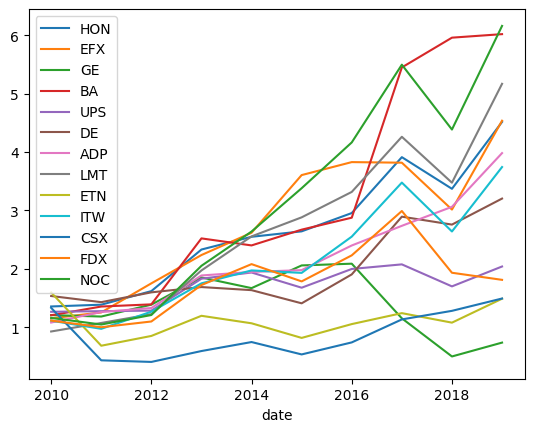

In [ ]:
result_df.add(1).cumprod().plot()

In [ ]:
import pandas as pd

from tiingo import TiingoClient                       # Stock prices.
tiingo = TiingoClient({'api_key':'b0d731010543ea64f4e68e57c0ab873ada655279'})

#prices = tiingo.get_dataframe(['HON','EFX','GE','BA','UPS','DE','ADP','LMT','ETN','ITW','CSX','FDX','NOC'],'2010-1-1','2019-12-31',metric_name = 'adjClose')
prices = tiingo.get_dataframe(['ADP','BA','DE','EFX','GE','HON','ITW','LMT','UPS'],'2010-1-1','2019-12-31',metric_name = 'adjClose')
prices.index = pd.to_datetime(prices.index).tz_convert(None)
prices

,ADP,BA,DE,EFX,GE,HON,ITW,LMT,UPS
2010-01-04,27.070039,43.712259,42.671674,26.785884,68.350720,28.653211,34.745889,49.797451,38.507323
2010-01-05,26.924671,45.143917,42.511826,26.777372,68.704640,28.710020,34.652890,50.315837,38.573509
2010-01-06,26.861468,46.513329,42.397649,27.066765,68.350720,28.710020,34.574199,49.577137,38.288907
2010-01-07,26.848827,48.396271,42.702121,27.177415,71.889916,29.263911,34.795966,48.216373,37.997687
2010-01-08,26.810905,47.929426,43.866724,27.185927,73.438314,29.910118,35.125039,48.993952,39.824435
...,...,...,...,...,...,...,...,...,...
2019-12-24,156.899622,331.015759,165.316187,135.349694,68.840022,163.352185,163.999524,352.569540,105.603350
2019-12-26,157.305931,327.954112,165.600398,136.038571,69.086099,163.880293,165.000742,354.494273,106.236988
2019-12-27,157.693770,328.172801,166.557243,136.038571,68.778503,163.509691,164.864212,355.668993,106.147743
2019-12-30,156.604125,324.455087,165.714083,134.786950,68.163310,163.454101,164.727683,354.132821,103.916624


In [ ]:
r = prices.pct_change()
r

,ADP,BA,DE,EFX,GE,HON,ITW,LMT,UPS
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.005370,0.032752,-0.003746,-0.000318,0.005178,0.001983,-0.002677,0.010410,0.001719
2010-01-06,-0.002347,0.030334,-0.002686,0.010807,-0.005151,0.000000,-0.002271,-0.014681,-0.007378
2010-01-07,-0.000471,0.040482,0.007181,0.004088,0.051780,0.019293,0.006414,-0.027447,-0.007606
2010-01-08,-0.001412,-0.009646,0.027273,0.000313,0.021538,0.022082,0.009457,0.016127,0.048075
...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.000647,-0.013479,-0.003142,0.000430,0.002688,-0.000680,-0.004915,-0.004414,-0.005129
2019-12-26,0.002590,-0.009249,0.001719,0.005090,0.003575,0.003233,0.006105,0.005459,0.006000
2019-12-27,0.002466,0.000667,0.005778,0.000000,-0.004452,-0.002261,-0.000827,0.003314,-0.000840
2019-12-30,-0.006910,-0.011329,-0.005062,-0.009200,-0.008945,-0.000340,-0.000828,-0.004319,-0.021019


<Axes: >

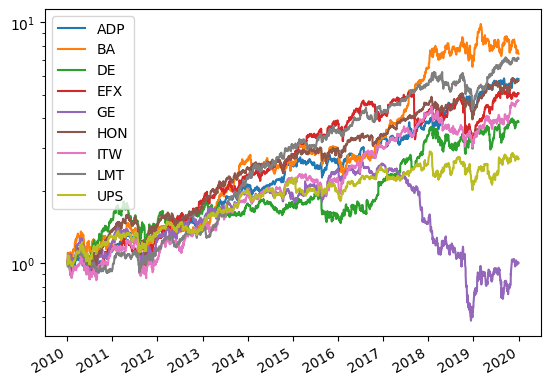

In [ ]:
r.add(1).cumprod().plot(logy=True)

In [ ]:
#This is the compound factor what $1 invested at the beginning would have turned into by end of 2019
compound_factors = r.add(1).prod()
compound_factors

ADP    5.816188
BA     7.407965
DE     3.863400
EFX    5.075481
GE     1.004459
HON    5.723319
ITW    4.733547
LMT    7.065737
UPS    2.712989
dtype: float64

Plot value of $1 investment:

<Axes: >

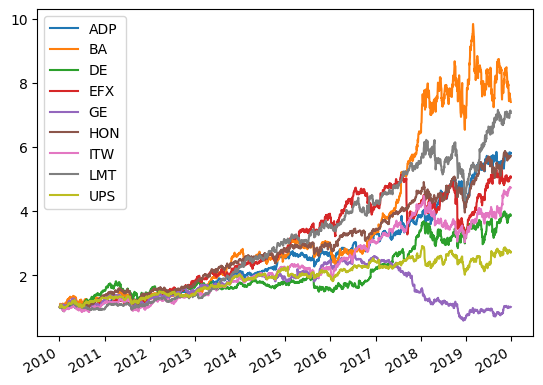

In [ ]:
r.add(1).cumprod().plot()

In [ ]:
#Let's look at the industrial Select ETF for the same time period
import os
from tiingo import TiingoClient
import pandas as pd
XLI_prices = tiingo.get_dataframe(['XLI'],'2010-1-1','2019-12-31',metric_name = 'adjClose')
XLI_prices.index = pd.to_datetime(XLI_prices.index).tz_convert(None)
XLI_returns = XLI_prices.pct_change()
XLI_returns

,XLI
2010-01-04,NaN
2010-01-05,0.003531
2010-01-06,0.002111
2010-01-07,0.010885
2010-01-08,0.015978
...,...
2019-12-24,-0.004019
2019-12-26,0.002323
2019-12-27,-0.000854
2019-12-30,-0.004640


<Axes: >

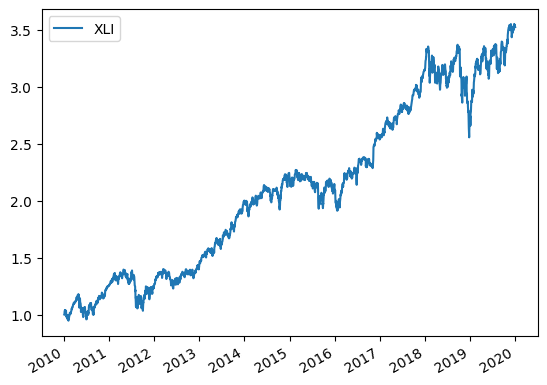

In [ ]:
#Value of $1 invested at the beginning of 2010 to 2019
XLI_returns.add(1).cumprod().plot()

In [ ]:
#Compound Factor for XLI Industrial ETF
XLI_compound = XLI_returns.add(1).prod()
XLI_compound

XLI    3.525256
dtype: float64

In [ ]:
xli_value = XLI_compound[0]
xli_value

3.5252559547804285

In [ ]:
#Create dataframe of those stocks that have out and underperformed the Industrial ETF
outperformer = compound_factors[compound_factors > xli_value]
underperformer = compound_factors[compound_factors < xli_value]

In [ ]:
import pandas as pd;

In [ ]:
data = {
    'Stock': ['ADP','BA','DE','EFX','GE','HON','ITW','LMT','UPS'],
    'Avg_Cosine_Similarity': [0.9114590600084234, 0.9253109099618219,0.5606468430846294,0.9509628469211835,0.2822132792120046,0.9523259711310581,0.8832493142794414, 0.9635099351147719,0.941346511467011]
}
cos_df = pd.DataFrame(data)
cos_df

,Stock,Avg_Cosine_Similarity
0,ADP,0.911459
1,BA,0.925311
2,DE,0.560647
3,EFX,0.950963
4,GE,0.282213
5,HON,0.952326
6,ITW,0.883249
7,LMT,0.963510
8,UPS,0.941347


In [ ]:
compound_df = pd.DataFrame(compound_factors, columns=['compound_factors'])
compound_df.index.name = 'Stock'
compound_df

,compound_factors
Stock,
ADP,5.816188
BA,7.407965
DE,3.863400
EFX,5.075481
GE,1.004459
HON,5.723319
ITW,4.733547
LMT,7.065737
UPS,2.712989


In [ ]:
merged_df = pd.merge(cos_df, compound_df, on='Stock', how = 'left')
merged_df

,Stock,Avg_Cosine_Similarity,compound_factors
0,ADP,0.911459,5.816188
1,BA,0.925311,7.407965
2,DE,0.560647,3.863400
3,EFX,0.950963,5.075481
4,GE,0.282213,1.004459
5,HON,0.952326,5.723319
6,ITW,0.883249,4.733547
7,LMT,0.963510,7.065737
8,UPS,0.941347,2.712989


In [ ]:
import matplotlib.pyplot as plt

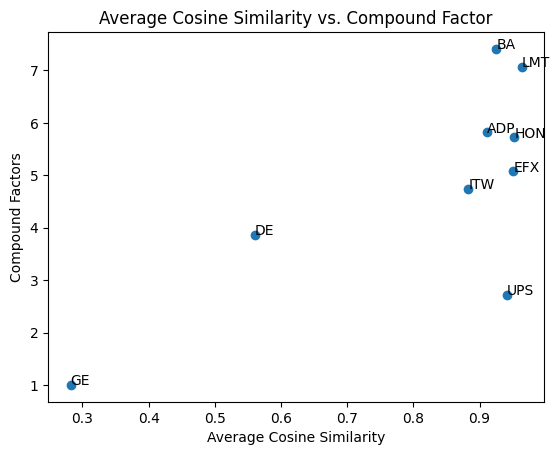

In [ ]:
#Create scatter plot
plt.scatter(merged_df['Avg_Cosine_Similarity'], merged_df['compound_factors'])

#Label each point with stock name
for i, Stock in enumerate(merged_df['Stock']):
  plt.annotate(Stock, (merged_df['Avg_Cosine_Similarity'].iloc[i], merged_df['compound_factors'].iloc[i]))

#Titles for plot and axis
plt.title('Average Cosine Similarity vs. Compound Factor')
plt.xlabel('Average Cosine Similarity')
plt.ylabel('Compound Factors')

plt.show()